In [1]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['errorbar.capsize'] = 12
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

totalT=96
lat_a=0.0871
hbarc = 1/197.327
lat_aInv=1/(lat_a*hbarc)

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN
tau=1
def C2pt2meff(C2pt):
    tfunc_C=lambda m,t:np.exp(-m*t)+np.exp(-m*(totalT-t))
    t=C2pt # dim=time
    t=(np.roll(t,-tau,axis=0))/(t)
    t=np.array([fsolve2(lambda m:((tfunc_C(m,xt+tau))/(tfunc_C(m,xt)))-ele, 0.0593) for xt,ele in enumerate(t)])
    return t
def c2pt2meff_log(c2pt):
    meff=np.log(c2pt/np.roll(c2pt,-1))
    return meff

In [2]:
import h5py
import numpy as np

path='/capstor/store/cscs/userlab/lp139/lyan/code/glwc2/project2/03_NpiScatteringWilson/dataPrepare/MILC_a09m130W/data_aux/cfgs_run'
with open(path,'r') as f:
    cfgs=f.read().splitlines()

basepath='/capstor/store/cscs/userlab/lp139/lyan/code/scratch/run/03_NpiScatteringWilson/MILC_a09m130W/run_pion2pt/'

c2pt=[]    
for icfg,cfg in enumerate(cfgs):
    print(f'{icfg}/{len(cfgs)}',end='              \r')
    path=f'{basepath}{cfg}/Diagram{cfg[1:]}_P.h5'
    try:
        with h5py.File(path) as f:
            srcs=list(f.keys()); srcs.sort()
            t=np.mean([f[src]['PhiPhi/pi2=0_0_0/a_a'][:,0,0] for src in srcs[:]],axis=0)
            t=t[:,0]
            c2pt.append(t)
    except:
        print(cfg,'           ')
c2pt=np.array(c2pt)
print(c2pt.shape)

(162, 96)            


<ErrorbarContainer object of 3 artists>

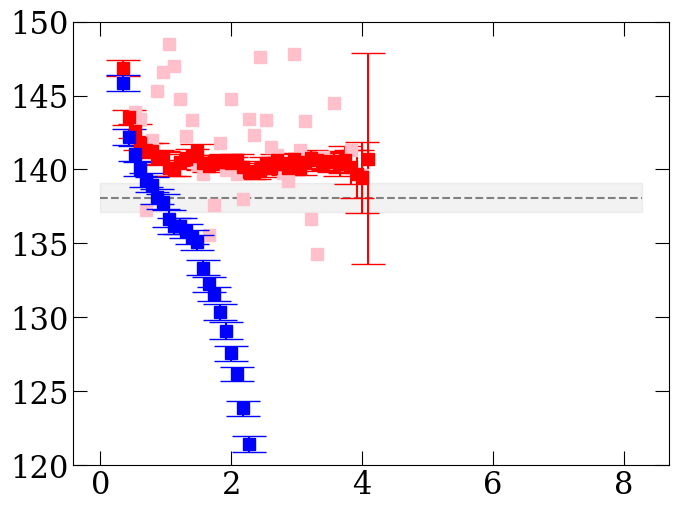

In [11]:
fig, axs = yu.getFigAxs(1,1)
ax=axs[0,0]
ax.set_ylim([120,150])
# ax.set_xlim([0,2])
xunit=lat_a; yunit=lat_aInv

color='grey'
mean=np.array([138.1]*totalT); err=np.array([1.0]*totalT)
x=np.arange(0,totalT)*xunit; ymin=mean-err; ymax=mean+err
ax.plot(x,mean,color=color,linestyle='--',marker='')
ax.fill_between(x, ymin, ymax, color=color, alpha=0.1)

t=yu.jackknife(c2pt)
meff=yu.jackmap(C2pt2meff,t)
meff_log=yu.jackmap(c2pt2meff_log,t)

tmin=1; tmax=48
mean,err=yu.jackme(meff)
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_yerr,color='r')

mean=C2pt2meff(np.mean(c2pt[:1],axis=0))
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit
ax.plot(plt_x,plt_y,color='pink')

mean,err=yu.jackme(meff_log)
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_yerr,color='b')

<ErrorbarContainer object of 3 artists>

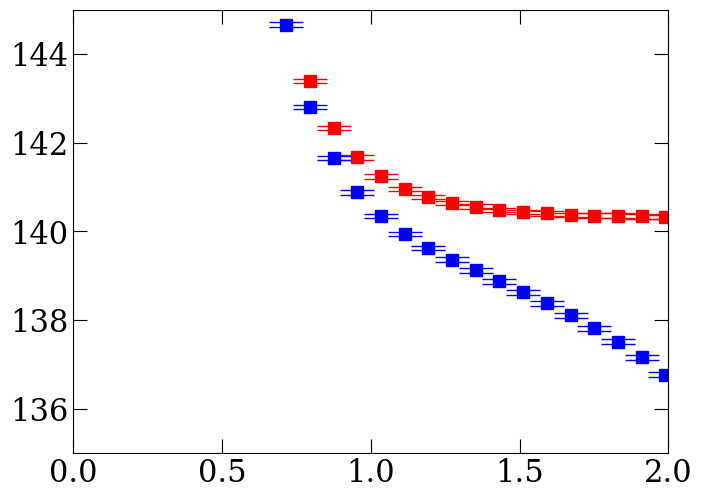

In [4]:
totalT=128
lat_a=0.07957
hbarc = 1/197.327
lat_aInv=1/(lat_a*hbarc)

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN
tau=1
def C2pt2meff(C2pt):
    tfunc_C=lambda m,t:np.exp(-m*t)+np.exp(-m*(totalT-t))
    t=C2pt # dim=time
    t=(np.roll(t,-tau,axis=0))/(t)
    t=np.array([fsolve2(lambda m:((tfunc_C(m,xt+tau))/(tfunc_C(m,xt)))-ele, 0.0593) for xt,ele in enumerate(t)])
    return t
def c2pt2meff_log(c2pt):
    meff=np.log(c2pt/np.roll(c2pt,-1))
    return meff

path='/capstor/store/cscs/userlab/lp139/lyan/code/code/projectData/fromBooster/projectDataMigrating/NST_e-scattering/pion2pt/B64.h5'
with h5py.File(path) as f:
    # print(f['data/piC'])
    t=f['data/piC'][:,:,0]
    c2pt_B=t
c2pt_B.shape

fig, axs = yu.getFigAxs(1,1)
ax=axs[0,0]
ax.set_ylim([135,145])
ax.set_xlim([0,2])
xunit=lat_a; yunit=lat_aInv

# color='grey'
# mean=np.array([138.1]*totalT); err=np.array([1.0]*totalT)
# x=np.arange(0,totalT)*xunit; ymin=mean-err; ymax=mean+err
# ax.plot(x,mean,color=color,linestyle='--',marker='')
# ax.fill_between(x, ymin, ymax, color=color, alpha=0.1)

t=yu.jackknife(c2pt_B)
meff=yu.jackmap(C2pt2meff,t)
meff_log=yu.jackmap(c2pt2meff_log,t)

tmin=1; tmax=48
mean,err=yu.jackme(meff)
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_yerr,color='r')

mean,err=yu.jackme(meff_log)
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_yerr,color='b')